#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/imdb_top_10000.txt', delimiter = "\t",names=["imdbID", "title", "year", "score", "votes", "runtime", "genres"])
df.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


In [23]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [24]:
new_df = df.dropna()
new_df

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9998,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


In [25]:
new_df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

Find the Longest and shortest runtime

*Display* the movies titles with runtime longer than 100 minutes.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

Splitting the runtime

In [26]:
new_df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [27]:
run_time = [int(r.split(' ')[0]) for r in new_df.runtime]
new_df['runtime'] = run_time
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [28]:
new_df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

Separate the Genres

In [29]:
genres = set()
for m in new_df.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres:
    new_df[genre] = [genre in movie.split('|') for movie in new_df.genres]
         
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


Separate year from movies

In [30]:
new_df['title'] = [t[0:-7] for t in new_df.title]
new_df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


## 4. EDA

In [31]:
small_df = new_df[['title', 'runtime']]
run_time = small_df['runtime']
print("Longest runtime")
print(run_time.max())
print("Shortest runtime")
print(run_time.min())


Longest runtime
450
Shortest runtime
0


In [32]:
small_df = new_df[['title', 'runtime']]
result = small_df[(small_df['runtime'] >= 100)]
result.head()

,title,runtime
0,The Shawshank Redemption,142
1,Pulp Fiction,154
2,Fight Club,139
3,The Matrix,136
4,Inception,148


## 5. Determining Best Movies

In [33]:
new_df[new_df.score == new_df.score.max()][['title', 'year', 'score', 'votes', 'genres', 'runtime']]

,title,year,score,votes,genres,runtime
0,The Shawshank Redemption,1994,9.2,619479,Crime|Drama,142
26,The Godfather,1972,9.2,474189,Crime|Drama,175


## 6. Trends in Popularity of Genres

In [34]:
 #Get the unique genres contained in the dataframe.
genre_set = set()
for genre in new_df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
    
len(genre_set)

24

In [35]:
genredf = new_df[list(genre_set)]
genredf.shape

(9999, 24)

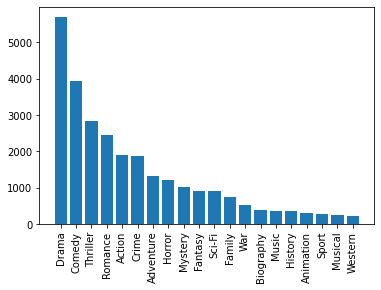

In [36]:
genrecount = genredf.sum()
genrecount = genrecount.sort_values(ascending=False)
plt.bar(genrecount.index[:20],genrecount[:20])
plt.xticks(rotation=90)
plt.show()

Out of 24 unique genres, Drama is most popular among all